# 实验

In [1]:
from rtree import index
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
import math
from scipy.optimize import leastsq
import matplotlib
import sys


In [2]:
def initiate(L,radius,C): 
    coordinate = np.ones(2)*L/2.0
    nodelist = {(coordinate[0],coordinate[1]):{1:1, 3:1, 5:0.0, 6:0, 7:1}}
    index2coor = {1:(coordinate[0],coordinate[1])}  
    idx = index.Index() 
    for key in nodelist:
        idx.insert(  nodelist[key][1],list(np.r_[coordinate,coordinate])  )                     
    limitt = np.r_[coordinate - radius,coordinate + radius]
    ksequence = []
    ksequence.append(1)
    return (nodelist,idx,limitt,index2coor,ksequence)

In [3]:
def choosenode(nodelist,limitt,C,ksequence,totpop):
    white = ( (limitt[2]-limitt[0])*(limitt[3]-limitt[1])-len(nodelist) )*C
    rnd = random.random()*( sum(ksequence)+len(nodelist)*C + white ) 
    if rnd> sum(ksequence)+len(nodelist)*C:
        while 1:
            ii = int( random.random()*(limitt[2]-limitt[0])   + limitt[0] )
            jj = int( random.random()*(limitt[3]-limitt[1])   + limitt[1] )
            if (ii,jj) not in nodelist:
                return (ii,jj),0,ksequence 
    else: 
        A = np.array(ksequence)+C
        B = np.cumsum(A)
        ind = np.nonzero(B<rnd)  
        if len(ind[0])==0:
            pos = 1
        else:
            pos = ind[0][-1]+1
        return index2coor[pos],1,ksequence

In [4]:
#无time
def onestep(nodelist,index2coor,idx,L,radius,C,limitt,totpop,ksequence):#9
    ss = 1
    for i in range(2):
        ss = ss*(limitt[i+2]-limitt[i])
    ss *= C
    ss += totpop
    locallambda = ss/(L**2*C + totpop)
    #time += random.expovariate(locallambda)

    two,flag,ksequence = choosenode(nodelist,limitt,C,ksequence,totpop)  
    i = two[0]; j = two[1]

    intersection = list(  idx.intersection( [i-radius,j-radius, i+radius,j+radius] )  )
    withincircle = 0    
    if len(intersection) > 0:
        for key in intersection:  
            if np.linalg.norm(np.array(index2coor[key]) - np.array([i,j])) <= radius:
                withincircle += 1
                continue
                
        if flag==1:
            nodelist[(i,j)][7] += 1
            nodelist[(i,j)][3] += 1
            ksequence[ nodelist[(i,j)][1]-1 ] += 1
            totpop += 1
        elif  withincircle > 0  and  flag==0: 
            totpop += 1
            nodelist[(i,j)] = {1:len(nodelist)+1,3:1,5:np.linalg.norm(np.array([i,j])-L/2),6:1,7:1} 
            index2coor[len(nodelist)] = (i,j)
            newpoint = [i,j]
            idx.insert( len(nodelist), np.r_[newpoint, newpoint] )
            ksequence.append( nodelist[(i,j)][3] )
            for i in range(2): 
                limitt[i]   = round(min(limitt[i],newpoint[i]-radius))
                limitt[i+2] = round(max(limitt[i+2],newpoint[i]+radius))
    return nodelist,index2coor,idx,limitt,totpop,ksequence#9

# 方圆问题

In [14]:
r = 100
m = 0
center = (1,1)
for i in range(1,r+1):
    for j in range(1,r+1):
        x = np.array([[i,j],[1,1]])  
        if np.linalg.norm(x) <= r:
            m += 1
delta = m/r
print(delta)

77.5


In [1]:
import numpy as np
deltas = []
for r in range(1,1000,1):
    m = 0
    for i in range(-r,r+1):
        for j in range(-r,r+1):
            x = np.array([i,j])
            if np.linalg.norm(x) <= r:
                m += 1
    delta = (m-np.pi*r**2)/(2*r+1)**2
    deltas.append(delta)
    print(r,delta)

1 0.20648970515668966
2 0.017345175425633103
3 0.014809512605956367
4 -0.015623240215267776
5 0.020332096365745195
6 -0.0005759498771156933
7 -0.0219468445595549
8 -0.014055120518154877
9 -0.004069265763914769
10 0.006441575149706744
11 -0.00592194911978258
12 -0.018222947387088333
13 -0.0026463078966736
14 -0.0032724852599279527
15 0.002228567057540645
16 -0.006655389640943102
17 -0.005649205622408326
18 -0.0064835790818794205
19 -0.0033628849085570144
20 0.0002159063438921456
21 -0.006729237551702934
22 -0.0017436268333135502
23 -0.0040301103435946084
24 -0.006896030182307719
25 -0.0009594034962017468
26 -0.000967117773834182
27 -0.0004036510634575302
28 -0.0030805295212057962
29 -0.0037573747971893215
30 -0.0017289406693936473
31 -0.004552920156158047
32 -0.0018913318996326984
33 -0.002716506963529696
34 -0.0014032992123085065
35 0.0009024001889512825
36 -0.0034723360953972052
37 -0.0013938387136759249
38 -0.003956787280091225
39 -0.00021830253325988156
40 -0.00023597709856259914
41

KeyboardInterrupt: 

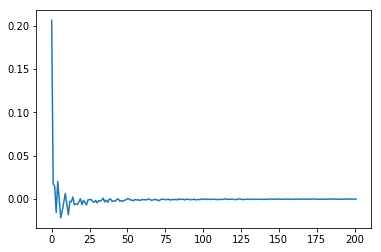

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(deltas)

r = 100  
100000人  
误差在2.65

# C 规模 阈值

C   越大 曲线越集陡  
规模越大 曲线越向外  
阈值越大 曲线峰值平滑

## 固定C 阈值无穷

点的分布是怎么样的？
随着规模的增大 中心点的叠加情况变化？

### 点的分布

In [ ]:
在一个过程中，

In [5]:
sequence = [];nodelist = {}
L = 10**5
radius  = 100
C = 0.01
nodelist,idx,limitt,index2coor,sequence = initiate(L,radius,C)

In [15]:
nodelist,idx,limitt,index2coor,sequence 

({(50000.0, 50000.0): {1: 1, 3: 1, 5: 0.0, 6: 0, 7: 1}},
 array([ 49900.,  49900.,  50100.,  50100.]),
 {1: (50000.0, 50000.0)},
 [1])

In [6]:
totpop = 1
maxnode  = 10000
while totpop < maxnode:
    nodelist,index2coor,idx,limitt,totpop,sequence = onestep(nodelist,index2coor,idx,L,radius,C,limitt,totpop,sequence)

In [17]:
nodelist,index2coor,idx,limitt,totpop,sequence

({(50000.0, 50000.0): {1: 1, 3: 1, 5: 0.0, 6: 0, 7: 1},
  (49944, 50013): {1: 2, 3: 1, 5: 57.489129407219238, 6: 1, 7: 1},
  (49995, 50075): {1: 3, 3: 1, 5: 75.166481891864535, 6: 1, 7: 1},
  (49948, 50156): {1: 4, 3: 1, 5: 164.43843832875572, 6: 1, 7: 1},
  (49878, 50120): {1: 5, 3: 1, 5: 171.12568480505783, 6: 1, 7: 1},
  (50004, 50162): {1: 6, 3: 1, 5: 162.04937519163718, 6: 1, 7: 1},
  (50031, 50226): {1: 7, 3: 2, 5: 228.11619846034608, 6: 1, 7: 2},
  (49905, 50120): {1: 8, 3: 1, 5: 153.05227865013967, 6: 1, 7: 1},
  (50072, 50043): {1: 9, 3: 1, 5: 83.86298349093002, 6: 1, 7: 1},
  (49980, 50078): {1: 10, 3: 1, 5: 80.523288556789581, 6: 1, 7: 1},
  (49976, 49985): {1: 11, 3: 1, 5: 28.301943396169811, 6: 1, 7: 1},
  (49814, 50168): {1: 12, 3: 1, 5: 250.63918289046507, 6: 1, 7: 1},
  (49830, 50073): {1: 13, 3: 1, 5: 185.0108104949546, 6: 1, 7: 1},
  (50106, 50264): {1: 14, 3: 1, 5: 284.48550050925269, 6: 1, 7: 1},
  (49926, 50204): {1: 15, 3: 1, 5: 217.00691233230336, 6: 1, 7: 1},
  

In [8]:
from collections import Counter
h = []
cnt = Counter()
for k in nodelist:
    h.append(nodelist[k][7])
Counter(h)

Counter({1: 8912, 2: 513, 3: 18, 4: 2})

In [28]:
a = [1,2,3]
a.index(2)
#通过值查询键

1

In [66]:
#查找重叠数为3的值
match_data = {}

for k,v in nodelist.items():
    if v[7] ==4:
        match_data[k] = v 
match_data
   # index = value_list.index(3)


{(47174, 49027): {1: 46819, 3: 4, 5: 2988.8133096598722, 6: 1, 7: 4},
 (47228, 49682): {1: 31911, 3: 4, 5: 2790.1806393135194, 6: 1, 7: 4},
 (47628, 49126): {1: 35390, 3: 4, 5: 2527.8963586349819, 6: 1, 7: 4},
 (47650, 52323): {1: 38375, 3: 4, 5: 3304.3651432612587, 6: 1, 7: 4},
 (47693, 51211): {1: 19275, 3: 4, 5: 2605.526818131028, 6: 1, 7: 4},
 (47990, 49824): {1: 21308, 3: 4, 5: 2017.6907592592081, 6: 1, 7: 4},
 (48057, 50882): {1: 16742, 3: 4, 5: 2133.8165338191566, 6: 1, 7: 4},
 (48349, 50014): {1: 19413, 3: 4, 5: 1651.0593568978675, 6: 1, 7: 4},
 (48477, 50125): {1: 6307, 3: 4, 5: 1528.1210685021001, 6: 1, 7: 4},
 (48511, 51714): {1: 11956, 3: 4, 5: 2270.4442296607949, 6: 1, 7: 4},
 (48577, 49277): {1: 12620, 3: 4, 5: 1596.13846517149, 6: 1, 7: 4},
 (48594, 49549): {1: 47104, 3: 4, 5: 1476.5625621693109, 6: 1, 7: 4},
 (48614, 50839): {1: 6804, 3: 4, 5: 1620.1595600433927, 6: 1, 7: 4},
 (48632, 51059): {1: 23614, 3: 4, 5: 1730.0014450861017, 6: 1, 7: 4},
 (48756, 51606): {1: 4773

In [47]:
#查找范围
x = []
y = []
for k in nodelist.keys():
    x.append(k[0])
    y.append(k[1])
max(x),min(x),max(y),min(y)

(54216, 45494, 55061, 45487)

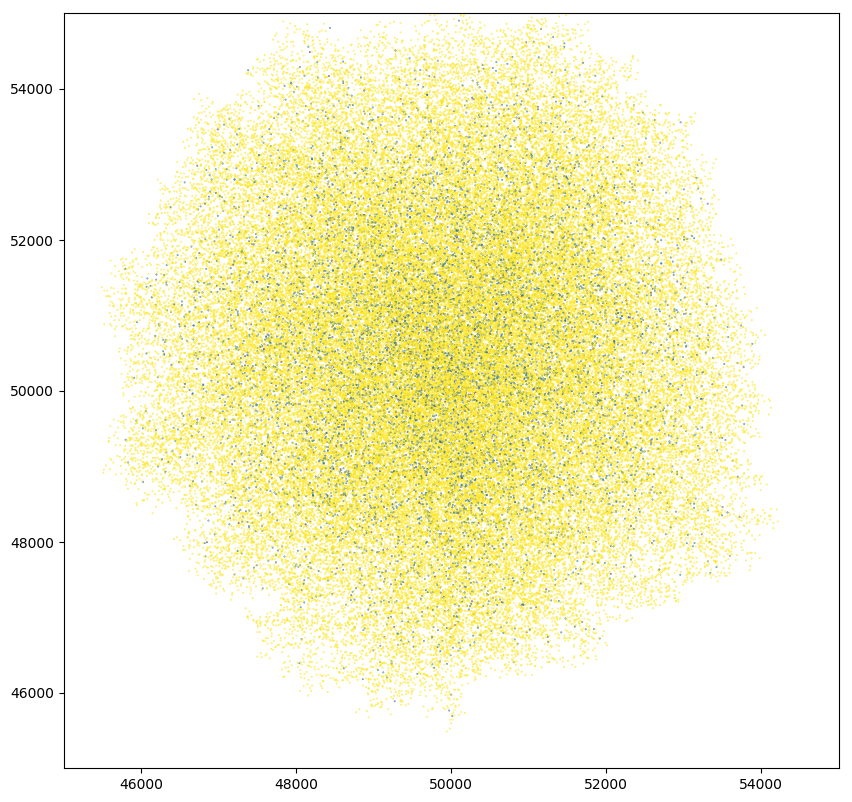

In [93]:
%matplotlib inline

import matplotlib.pyplot as plt  
x = nodelist
a = []
m = []
n = []
c = []
for k,v in x.items():
    a.append(k)
    c.append(1/(v[7]))
for i in a:
    m.append(i[0])
    n.append(i[1])
plt.figure(figsize=(10,10),dpi=100)
plt.scatter(m,n,s = 0.1,c = c)
plt.xlim((45000, 55000))
plt.ylim((45000, 55000))
plt.show()

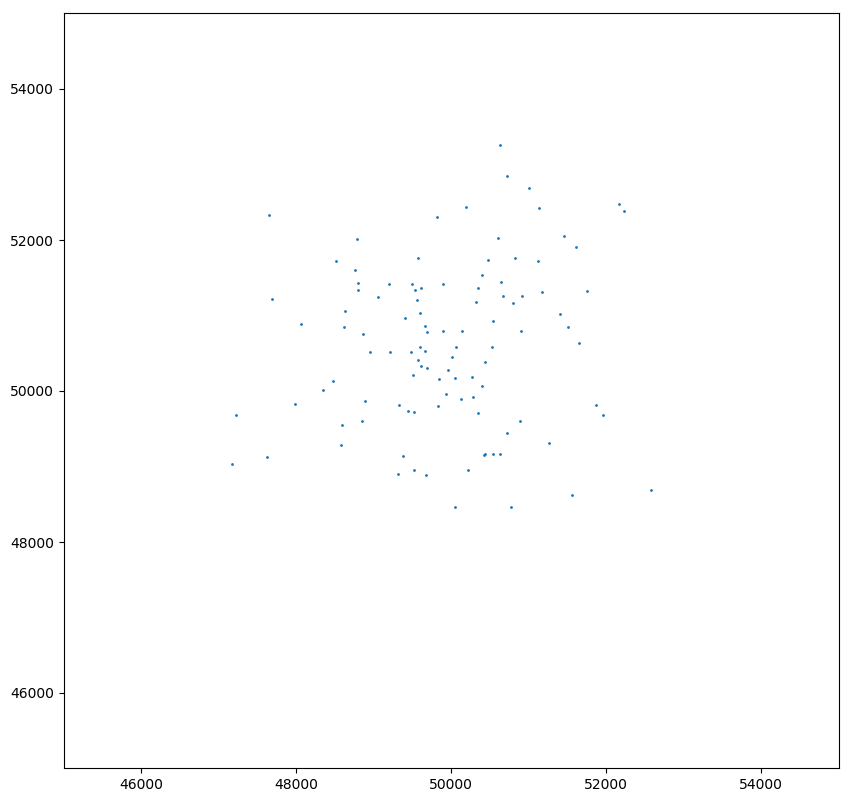

In [92]:
%matplotlib inline
#查找重叠数为3的值
match_data = {}

for k,v in nodelist.items():
    if v[7] ==4:
        match_data[k] = v 
match_data
   # index = value_list.index(3)
import matplotlib.pyplot as plt  
x = match_data
a = []
m = []
n = []
c = []
for k,v in x.items():
    a.append(k)
    c.append(v[7])
for i in a:
    m.append(i[0])
    n.append(i[1])
plt.figure(figsize=(10,10),dpi=100)
plt.scatter(m,n,s = 1)
plt.xlim((45000, 55000))
plt.ylim((45000, 55000))
plt.show()

实验结果： C = 0.01 r=100  maxnode = 100000
Counter({1: 86283, 2: 10033, 3: 1049, 4: 107, 5: 15})

# 统计部分

In [7]:
w = []    
for key in nodelist:
    w.append([nodelist[key][5],nodelist[key][7]])
w.sort()
w = np.array(w)

In [11]:
RL = np.zeros((len(R),2)) 
R = np.arange(0,np.max(w[:,0]),100)
R

array([    0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
         800.,   900.,  1000.,  1100.,  1200.,  1300.,  1400.,  1500.,
        1600.,  1700.,  1800.,  1900.,  2000.,  2100.,  2200.,  2300.,
        2400.])

In [113]:
w

array([[  0.00000000e+00,   2.00000000e+00],
       [  1.00000000e+00,   1.00000000e+00],
       [  5.83095189e+00,   1.00000000e+00],
       ..., 
       [  5.28346572e+03,   1.00000000e+00],
       [  5.28903110e+03,   1.00000000e+00],
       [  5.35017243e+03,   1.00000000e+00]])

In [12]:
RL[:,0] = R
RL

array([[    0.,     0.],
       [  100.,     0.],
       [  200.,     0.],
       [  300.,     0.],
       [  400.,     0.],
       [  500.,     0.],
       [  600.,     0.],
       [  700.,     0.],
       [  800.,     0.],
       [  900.,     0.],
       [ 1000.,     0.],
       [ 1100.,     0.],
       [ 1200.,     0.],
       [ 1300.,     0.],
       [ 1400.,     0.],
       [ 1500.,     0.],
       [ 1600.,     0.],
       [ 1700.,     0.],
       [ 1800.,     0.],
       [ 1900.,     0.],
       [ 2000.,     0.],
       [ 2100.,     0.],
       [ 2200.,     0.],
       [ 2300.,     0.],
       [ 2400.,     0.]])

In [13]:
for i in range(len(RL)):
    RL[i,1] = np.sum(w[w[:,0]<RL[i,0],1])
RL

array([[    0.,     0.],
       [  100.,    75.],
       [  200.,   298.],
       [  300.,   612.],
       [  400.,  1021.],
       [  500.,  1518.],
       [  600.,  2096.],
       [  700.,  2721.],
       [  800.,  3433.],
       [  900.,  4181.],
       [ 1000.,  4916.],
       [ 1100.,  5656.],
       [ 1200.,  6326.],
       [ 1300.,  6949.],
       [ 1400.,  7563.],
       [ 1500.,  8122.],
       [ 1600.,  8640.],
       [ 1700.,  9077.],
       [ 1800.,  9407.],
       [ 1900.,  9627.],
       [ 2000.,  9801.],
       [ 2100.,  9908.],
       [ 2200.,  9955.],
       [ 2300.,  9984.],
       [ 2400.,  9995.]])

In [114]:
w[[1,0],1]

array([ 1.,  2.])

In [15]:
delta =100
Rrho = np.zeros((len(R),2))
Rrho[:,0] = R + 100/2
for i in range(len(Rrho)-1):
    Rrho[i,1] = (RL[i+1,1] - RL[i,1])/(math.pi*(delta**2+2*delta*RL[i,0]))
Rrho

array([[  5.00000000e+01,   2.38732415e-03],
       [  1.50000000e+02,   2.36610349e-03],
       [  2.50000000e+02,   1.99898609e-03],
       [  3.50000000e+02,   1.85983919e-03],
       [  4.50000000e+02,   1.75777793e-03],
       [  5.50000000e+02,   1.67257377e-03],
       [  6.50000000e+02,   1.53033599e-03],
       [  7.50000000e+02,   1.51091093e-03],
       [  8.50000000e+02,   1.40056350e-03],
       [  9.50000000e+02,   1.23135666e-03],
       [  1.05000000e+03,   1.12166341e-03],
       [  1.15000000e+03,   9.27250538e-04],
       [  1.25000000e+03,   7.93228236e-04],
       [  1.35000000e+03,   7.23860260e-04],
       [  1.45000000e+03,   6.13569746e-04],
       [  1.55000000e+03,   5.31885552e-04],
       [  1.65000000e+03,   4.21519455e-04],
       [  1.75000000e+03,   3.00120750e-04],
       [  1.85000000e+03,   1.89265338e-04],
       [  1.95000000e+03,   1.42015180e-04],
       [  2.05000000e+03,   8.30711166e-05],
       [  2.15000000e+03,   3.47920108e-05],
       [  

(0, 0.007)

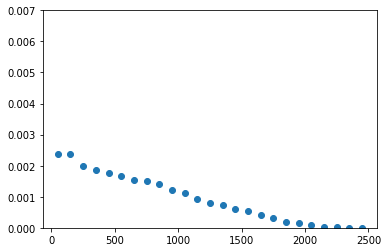

In [16]:
x = Rrho[:,0]
y = Rrho[:,1]
plt.scatter(x,y)
plt.ylim(0,0.007)

In [17]:
namerho = 'N='+str(maxnode)+'--C'+str(C)+'--R'+str(100)+'.csv'

In [18]:
a = Rrho
xx = np.nonzero(a[:,1]==0)  #会返回类似“(array([41]),)”这样的结果
if len(xx[0])==0:
    x = 0 
else:
    x = xx[0][0]
Rrhox = Rrho[:x,:x]
np.savetxt(namerho, Rrhox, delimiter=',')

In [8]:
import pandas as pd 
import pandas 
df = pd.read_csv(r"I:\Project\ScaleCity\Scaling\N=100000--C0.0100--R10.0--v0.csv",sep = ',')
df1 = pd.read_csv(r"I:\Project\ScaleCity\Scaling\N=100000--C0.0100--R100--v0.csv",sep = ',')

In [36]:
%matplotlib inline
df[2] = df1.iloc[:,[1]]

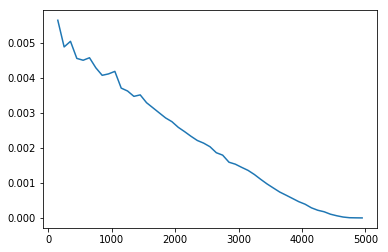

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1.iloc[:,0],df1.iloc[:,1])

,5.000000000000000000e+01,6.652676621241224858e-03,2
0,150.0,0.005708,0.002366
1,250.0,0.005322,0.001999
2,350.0,0.005179,0.001860
3,450.0,0.004824,0.001758
4,550.0,0.004937,0.001673
5,650.0,0.004838,0.001530
6,750.0,0.004632,0.001511
7,850.0,0.004307,0.001401
8,950.0,0.004453,0.001231
9,1050.0,0.003961,0.001122


In [28]:
import random
random.randint(1,4)

2